In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from playervectors import PlayerHeatMap
from ExtractData import ExtractCoordinates, ExtractPlayers, ExtractTeams, ExtractMinutesPlayed, ExtractGoalkeepers, CalcPlayingDirection, NormalizeDirection

In [63]:
df_players = pd.read_csv('event_streams/players.csv')
df_players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,NaN,Tekin,4502.0,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687.0
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,NaN,Sarr,3775.0,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423.0
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,NaN,Mandanda,3772.0,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,NaN,O. Mandanda,NaN
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,NaN,N'Diaye,683.0,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314.0
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,NaN,Konat\u00e9,2975.0,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,NaN


In [64]:
# Extract Players
# Mapping {playerID -> [list of selected attributes]}
players = ExtractPlayers(df=df_players, wy_id='wyId', attributes=['firstName', 'lastName', 'currentTeamId'])

In [65]:
df_playerank = pd.read_csv('event_streams/playerank.csv')
df_playerank.head()

,goalScored,playerankScore,matchId,playerId,roleCluster,minutesPlayed
0,0,0.0053,2057991,10014,right CB,90
1,0,0.0009,2057992,10014,right CB,41
2,0,-0.0013,2057998,100140,central MF,90
3,0,0.0031,2058000,100140,left CB,90
4,0,0.0035,2499869,10108,right CB,90


In [66]:
keepers = ExtractGoalkeepers(df_players, wy_code='name', keeper_str='Goalkeeper')
print(keepers)

{32777: 'Goalkeeper', 393230: 'Goalkeeper', 33: 'Goalkeeper', 99: 'Goalkeeper', 32923: 'Goalkeeper', 393566: 'Goalkeeper', 328190: 'Goalkeeper', 99430: 'Goalkeeper', 20771: 'Goalkeeper', 240507: 'Goalkeeper', 492782: 'Goalkeeper', 99749: 'Goalkeeper', 264084: 'Goalkeeper', 20802: 'Goalkeeper', 166534: 'Goalkeeper', 363560: 'Goalkeeper', 3267: 'Goalkeeper', 101576: 'Goalkeeper', 3296: 'Goalkeeper', 3299: 'Goalkeeper', 3330: 'Goalkeeper', 134413: 'Goalkeeper', 3397: 'Goalkeeper', 3398: 'Goalkeeper', 3399: 'Goalkeeper', 134475: 'Goalkeeper', 3428: 'Goalkeeper', 3458: 'Goalkeeper', 3486: 'Goalkeeper', 3488: 'Goalkeeper', 3519: 'Goalkeeper', 3551: 'Goalkeeper', 3554: 'Goalkeeper', 3663: 'Goalkeeper', 3719: 'Goalkeeper', 3785: 'Goalkeeper', 3821: 'Goalkeeper', 3822: 'Goalkeeper', 3823: 'Goalkeeper', 3915: 'Goalkeeper', 3963: 'Goalkeeper', 3994: 'Goalkeeper', 4319: 'Goalkeeper', 4348: 'Goalkeeper', 4350: 'Goalkeeper', 4476: 'Goalkeeper', 70134: 'Goalkeeper', 70161: 'Goalkeeper', 135747: 'Goal

In [67]:
# Extract played minutes
# Mapping {playerID -> minutes}
minutes_played = ExtractMinutesPlayed(df=df_playerank, column_player='playerId', column_minutes='minutesPlayed')

In [68]:
df_events = pd.read_csv('event_streams/actions.csv')
# df_events = pd.read_csv('data/actions.csv')
df_events.head()

,Unnamed: 0,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,result_name,bodypart_name
0,0,2500089,1,2.763597,1659,9637,52.50,34.00,63.00,30.60,251700146.0,0,0,1,0,pass,success,foot
1,1,2500089,1,4.761353,1659,8351,63.00,30.60,64.05,10.20,251700147.0,0,0,1,1,pass,success,foot
2,2,2500089,1,5.533097,1659,9285,64.05,10.20,72.45,20.40,251700148.0,0,0,1,2,pass,success,foot
3,3,2500089,1,7.707561,1659,239411,72.45,20.40,35.70,19.04,251700161.0,0,0,1,3,pass,success,foot
4,4,2500089,1,11.614943,1659,9637,35.70,19.04,30.45,12.24,251700149.0,0,0,1,4,pass,success,foot


In [69]:
def CalcPlayingDirection2(df: pd.DataFrame,
                         keepers: dict,
                         playerID_col: str='playerId',
                         matchID_col: str='matchId',
                         matchPeriod_col: str='matchPeriod',
                         teamID_col: str='teamId',
                         cord_col: str='pos_orig_x') -> dict:
    directions = {} 
    for _, row in df.iterrows():
        playerID = row[playerID_col]
        matchID = row[matchID_col]
        matchPeriod = row[matchPeriod_col]
        teamID = row[teamID_col]
        cord = float(row[cord_col])

        if playerID in keepers:
            direction = 'ltr' if cord <= 50.0 else 'rtl'

            if matchID not in directions:
                directions[matchID] = {}
            
            if teamID not in directions[matchID]:
                directions[matchID][teamID] = {}
            
            if matchPeriod not in directions[matchID][teamID]:
                directions[matchID][teamID][matchPeriod] = {'ltr': 0, 'rtl': 0}
            directions[matchID][teamID][matchPeriod][direction] += 1
    return directions


# directions = CalcPlayingDirection2(df_events, keepers, playerID_col='player_id', teamID_col='team_id', matchID_col='game_id', cord_col='start_x', matchPeriod_col='period_id')
# print(directions)

In [70]:
# df_events = NormalizeDirection(df_events, directions)

In [ ]:
df_events['start_x'] = 100 - df_events['start_x']
df_events['start_y'] = 100 - df_events['start_y']

In [71]:
# {action -> {playerID -> ([list of x coordinates], [list of y coordinates])}}
coordinates = ExtractCoordinates(df=df_events, column_player_id='player_id', column_event_name='type_name', column_x='start_x', column_y='start_y', actions=['pass'])

In [72]:
df_teams = pd.read_csv('event_streams/teams.csv')
df_teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [73]:
# Extracting Team Information
# Mapping {teamID -> [selected attributes e.g. TeamName, City, ...]}
teams = ExtractTeams(df=df_teams, wy_id='wyId', attributes=['name'])

In [74]:
# Mapping {teamID -> [list of playerIDs]}
teamID_to_playerIDs = {}

# Mapping {playerID -> Player Name}
playersID_to_name = {}

for playerID, attributes in players.items():
    first, last, teamID = attributes[0], str(attributes[1]), str(attributes[2])
    
    if teamID not in teamID_to_playerIDs:
        teamID_to_playerIDs[teamID] = [playerID]
    else:
        teamID_to_playerIDs[teamID].append(playerID)
    
    if playerID not in playersID_to_name:
        playersID_to_name[playerID] = f'{first} {last}'

In [75]:
# Hyperparameters
M, N = 50, 50

sigma = 8.0
action = 'pass'
# action = 'Pass'
playerID_to_heatmap = {}
for playerID, pairXY in list(coordinates[action].items()):
    x, y = pairXY[0], pairXY[1] 

    # Check for played minutes 
    minutes = 0.0 
    if playerID in minutes_played: 
        minutes = minutes_played[playerID] 

    # Check for player name
    player_name = None
    if playerID in playersID_to_name:
        player_name = playersID_to_name[playerID]

    # Build Player-Vectors
    heatmap = PlayerHeatMap(shape=(M, N),
                            player_name=player_name,
                            player_id=playerID,
                            action_name=action,
                            sigma=sigma,
                            map_size=[[0, 100], [0, 100]])
    
    # 1 - 3: Counting + Normalizing + Smoothing
    heatmap.fit(x, y, minutes)

    # 4: TODO: Create matrix M of all reshaped heatmaps and use NMF
    
    playerID_to_heatmap[playerID] = heatmap

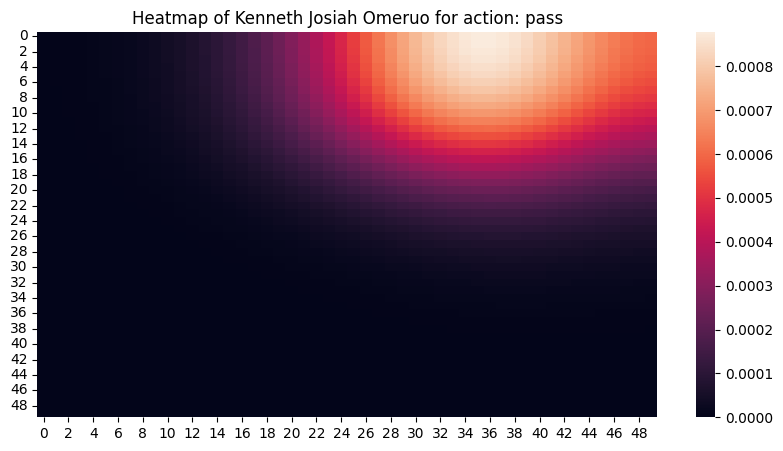

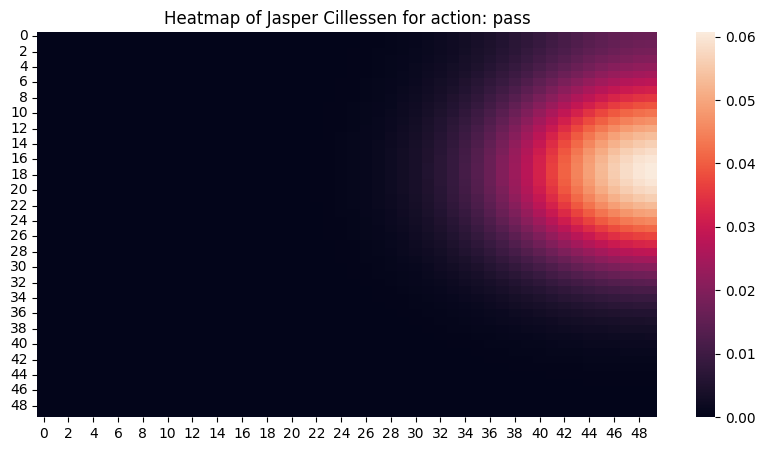

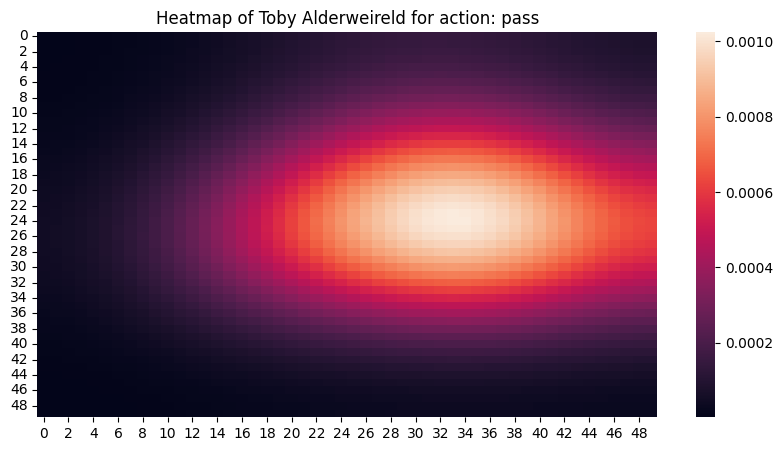

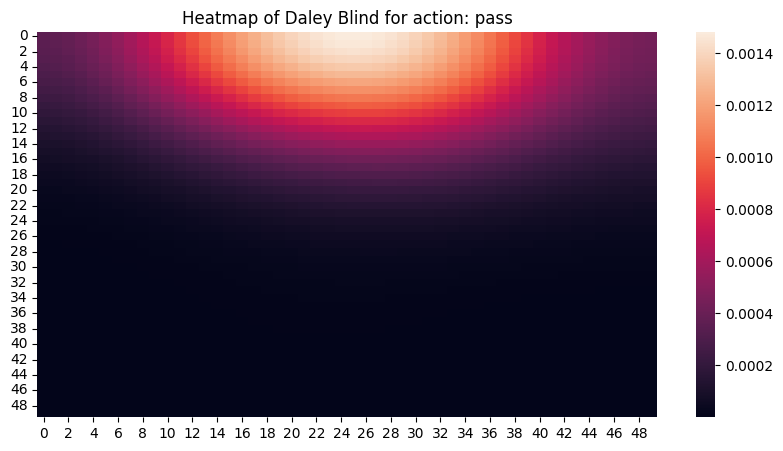

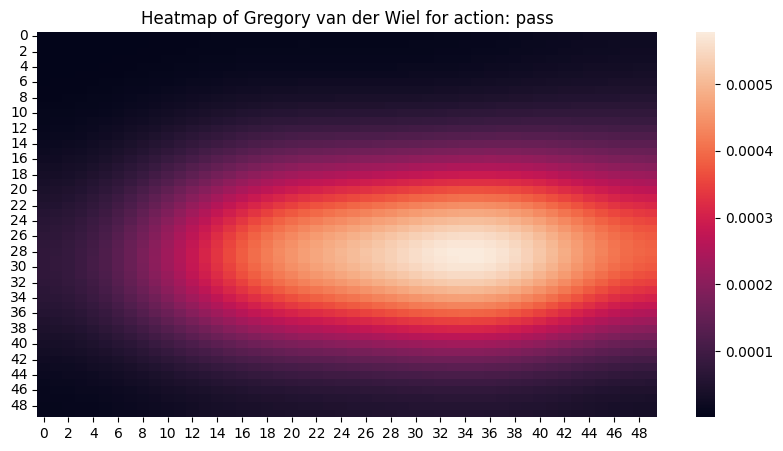

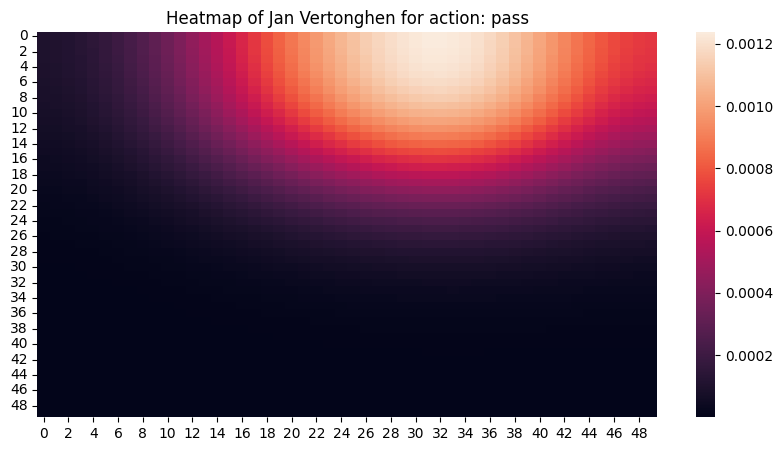

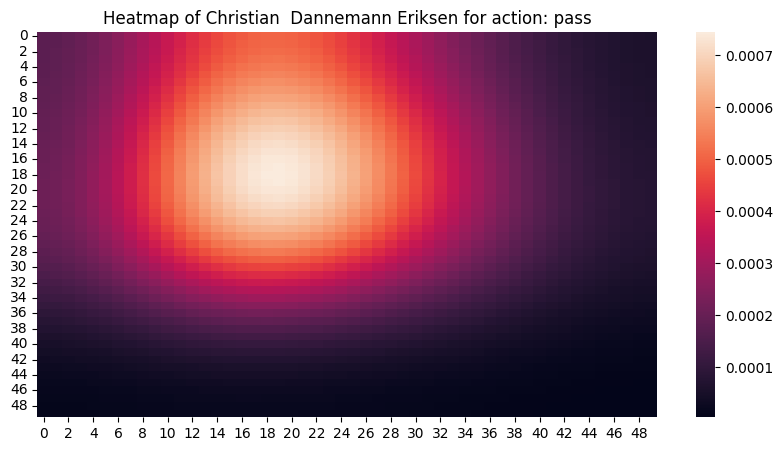

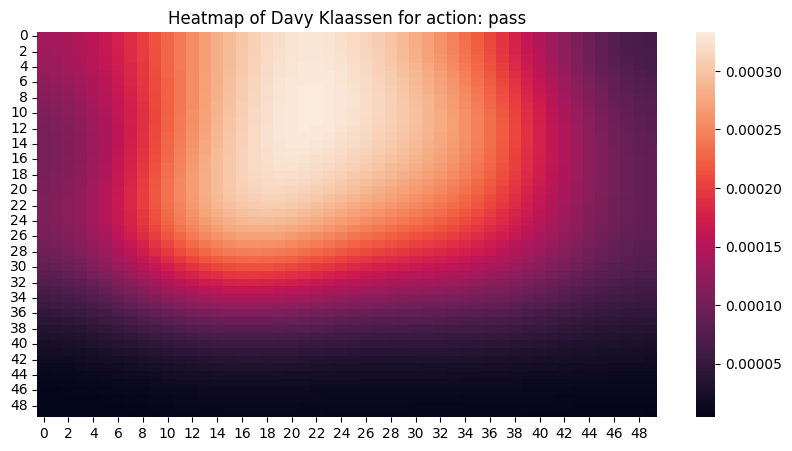

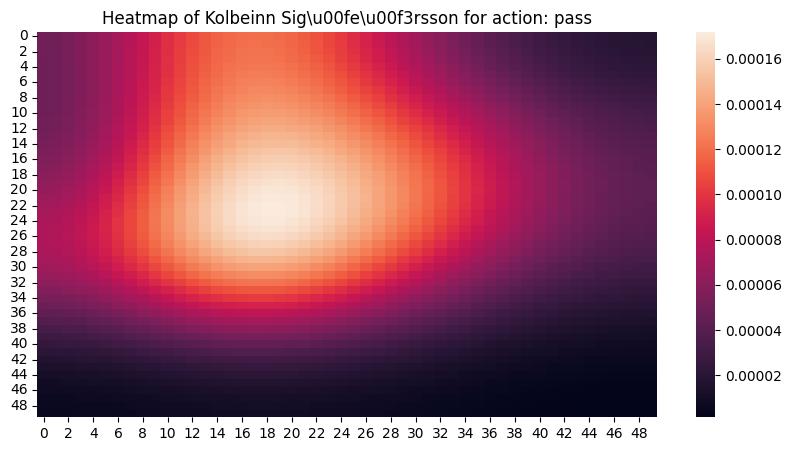

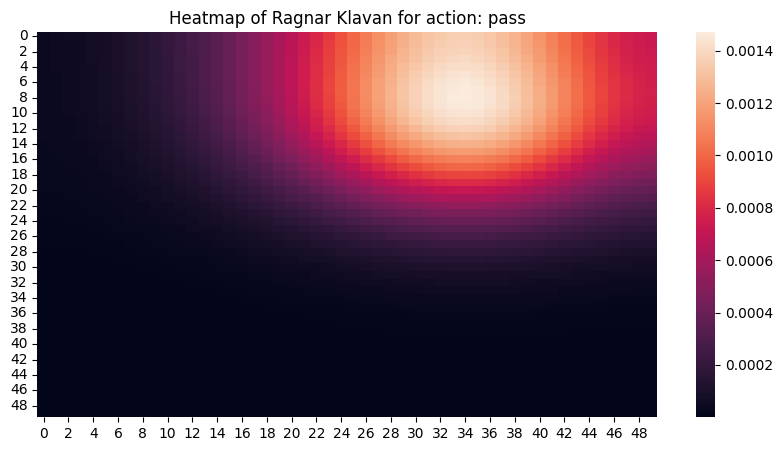

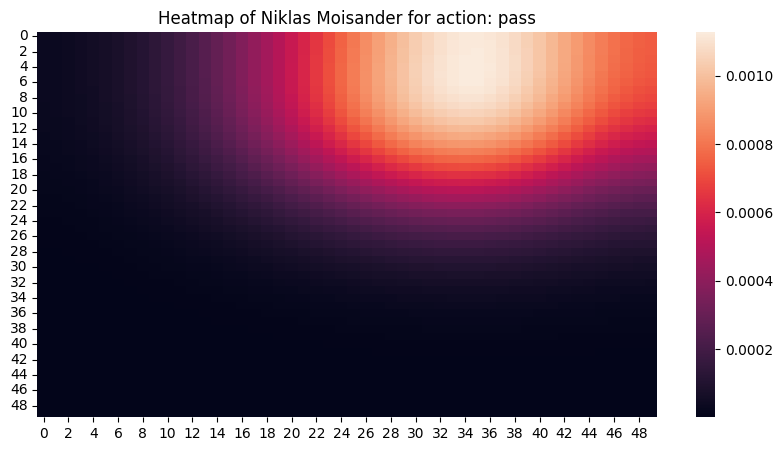

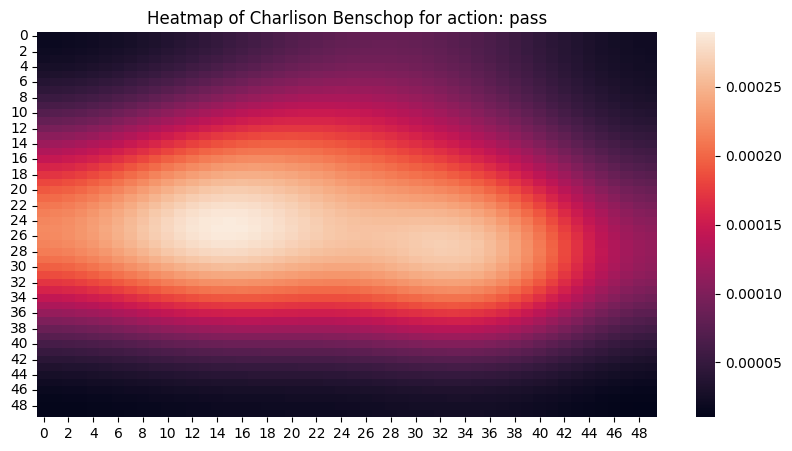

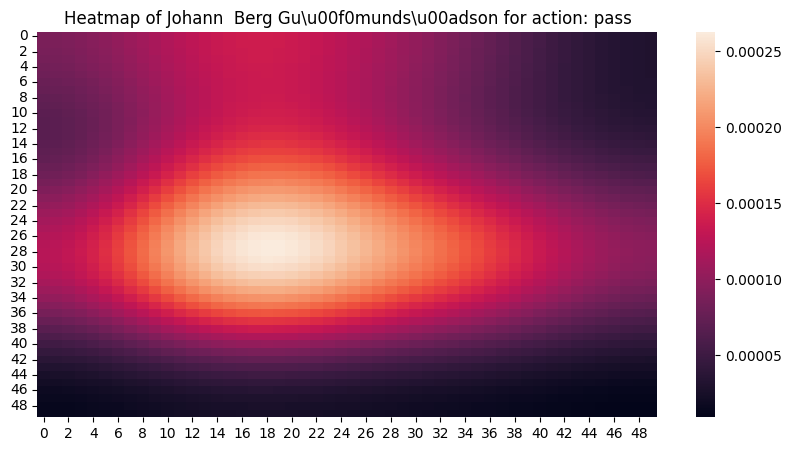

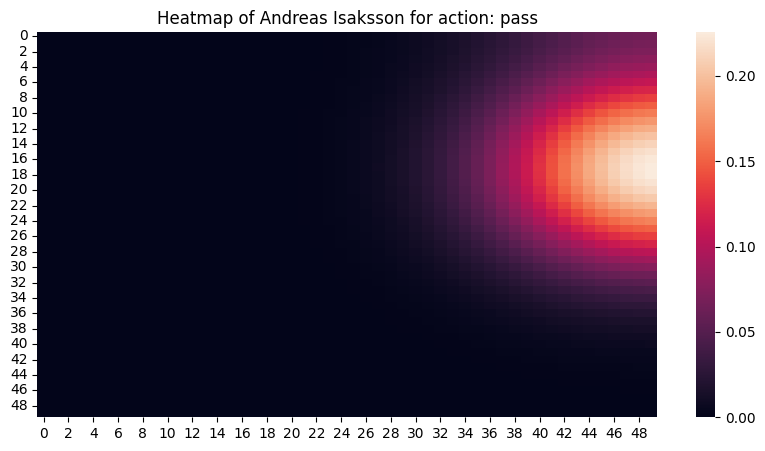

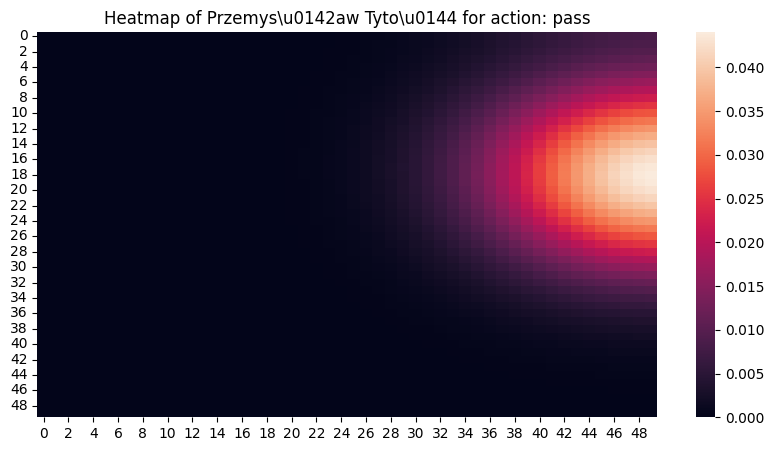

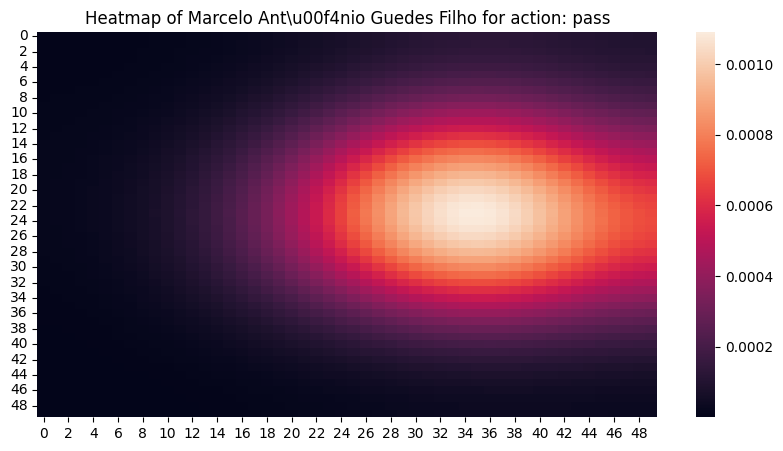

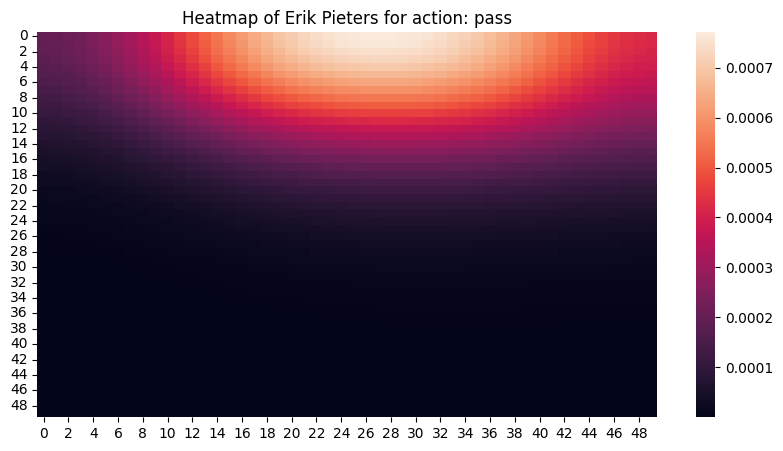

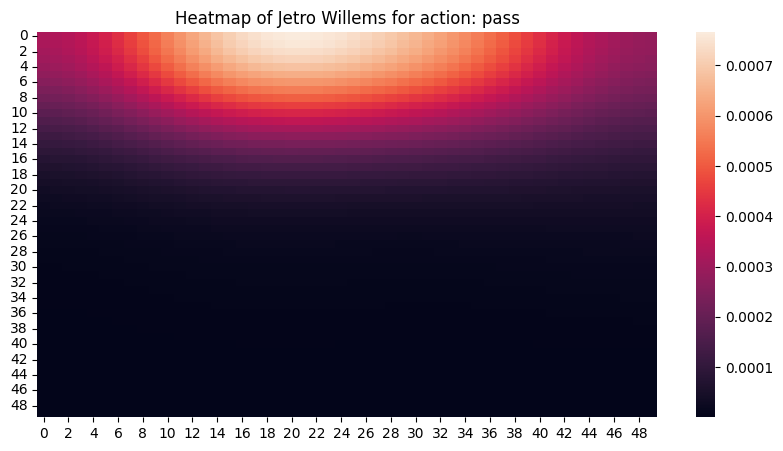

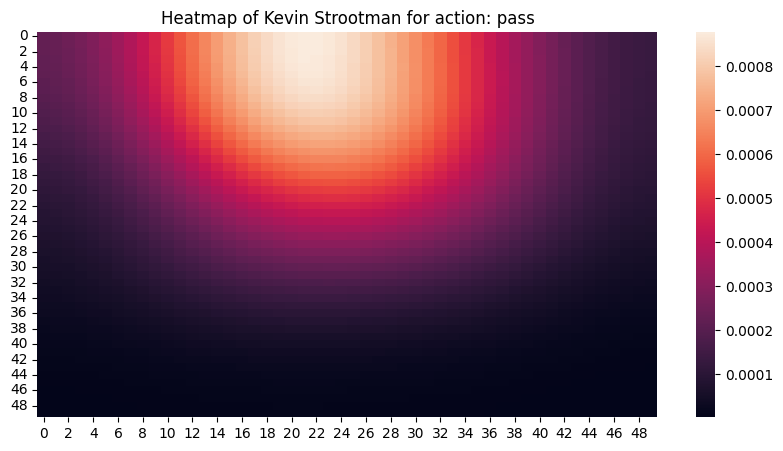

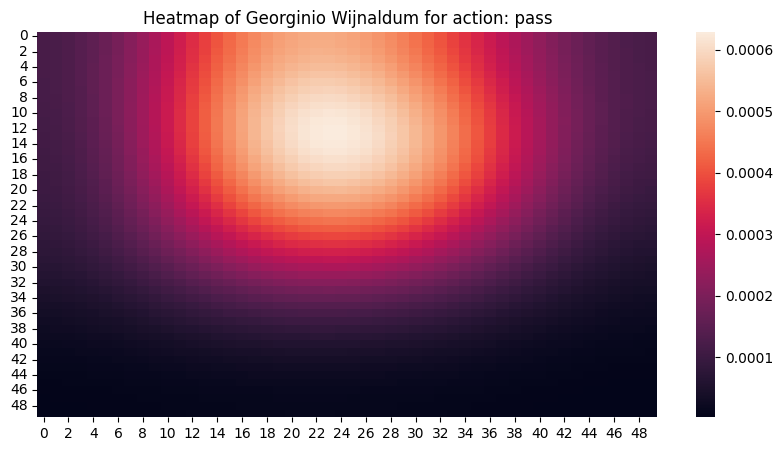

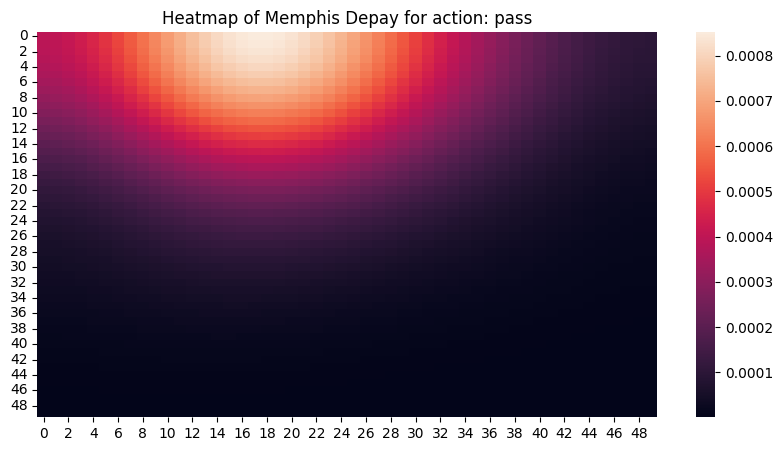

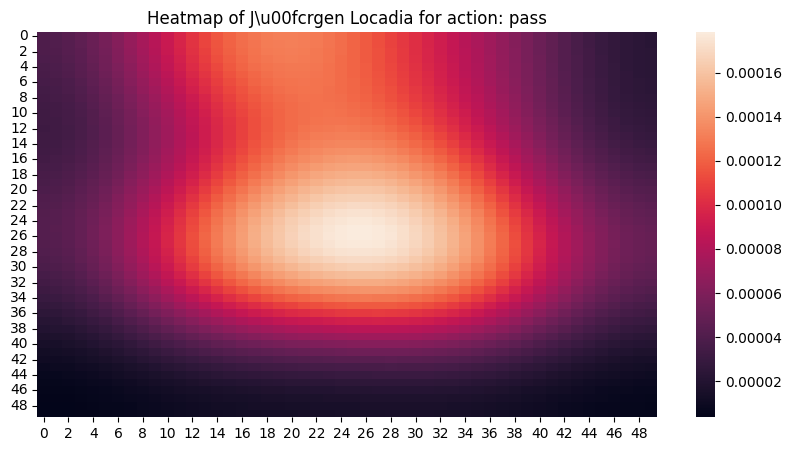

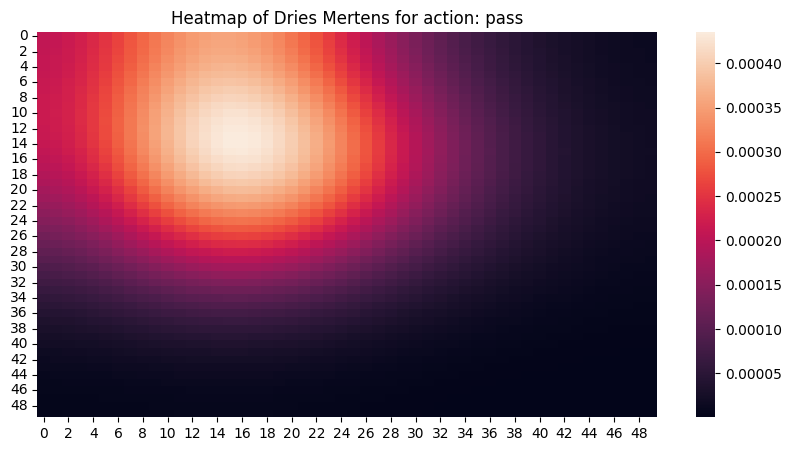

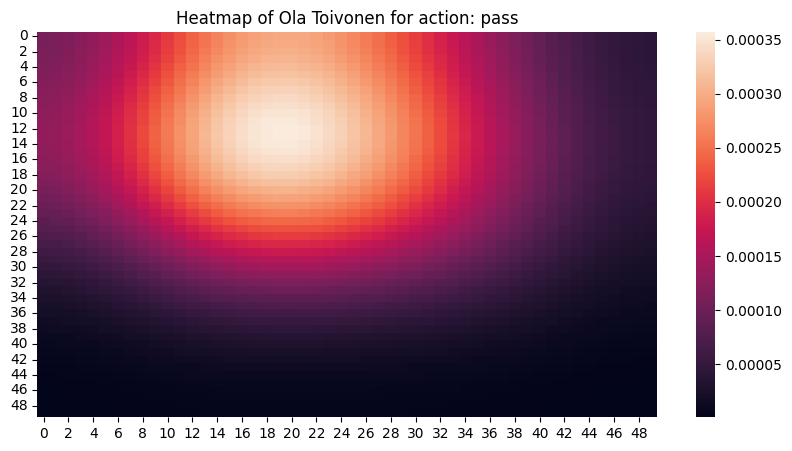

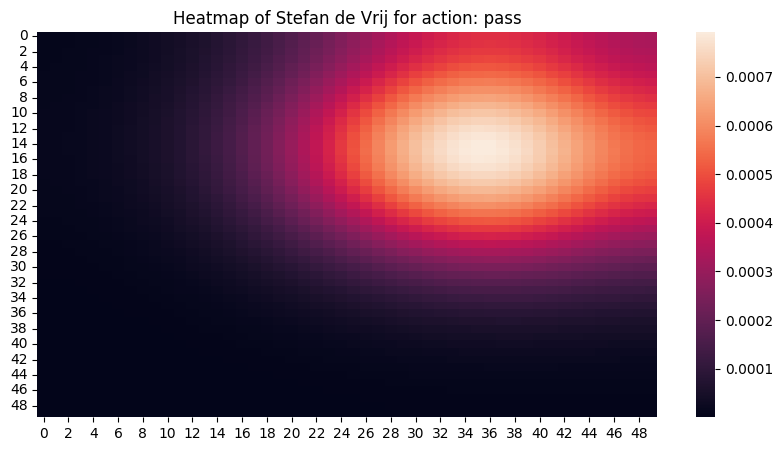

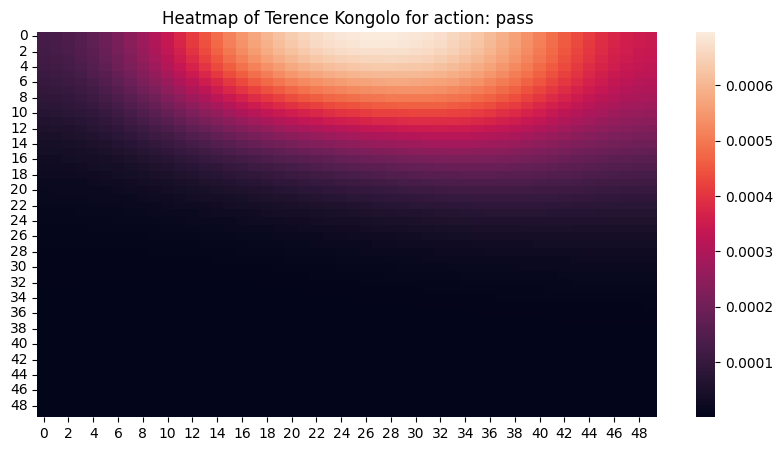

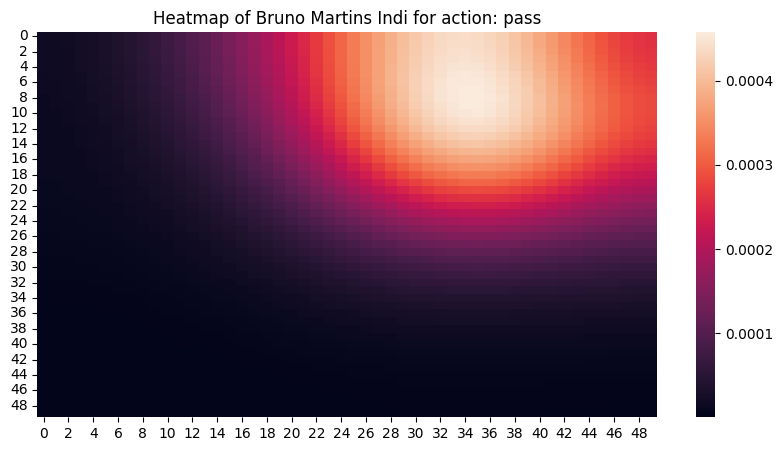

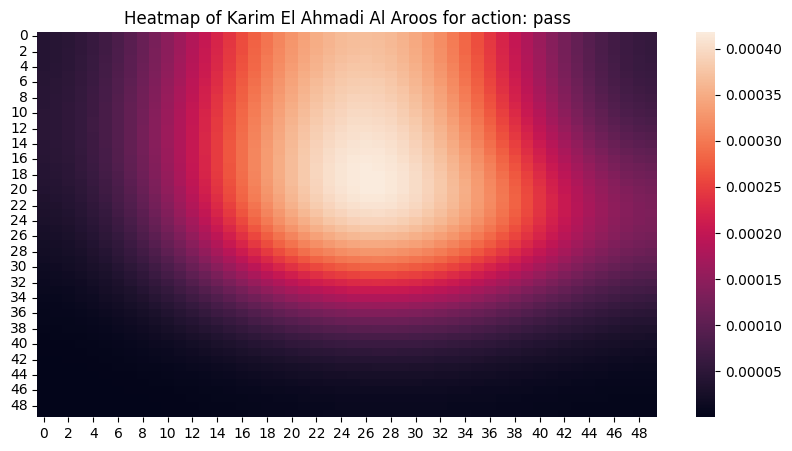

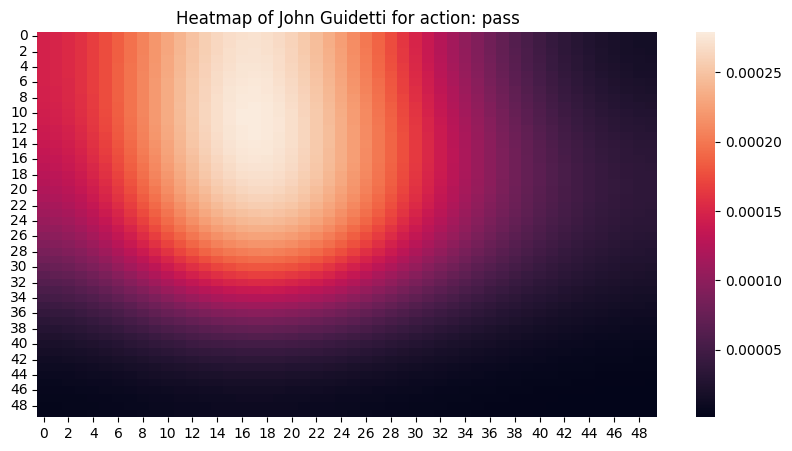

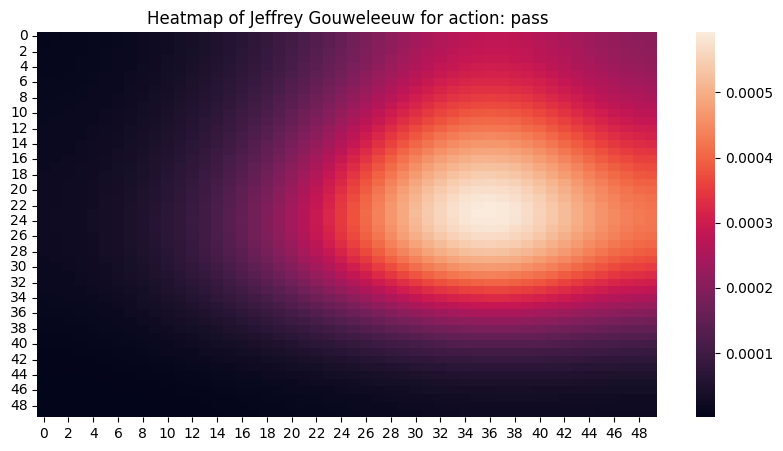

In [76]:
# Render first 30 heatmaps of german players
for i, (playerID, heatmap) in enumerate(playerID_to_heatmap.items()):
    if heatmap.player_name is not None: 
        plt.figure(figsize=(10, 5)) 
        heatmap.heatmap()
        plt.show()
    if i > 29: break